In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [59]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [60]:
X = X.drop(["Geography", "Gender"], axis=1)
X = pd.concat([X, geography, gender], axis=1)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [63]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [65]:
model = Sequential([
    Dense(units=11, activation="relu",  input_shape=[X_train.shape[-1]]),
    Dense(units=7, activation="relu"),
    Dense(units=6, activation="relu"),
    Dense(units=1, activation="sigmoid"),
])

In [66]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    restore_best_weights=True
)

In [68]:
model_history = model.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks=[early_stop])

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5493 - accuracy: 0.7647 - val_loss: 0.4639 - val_accuracy: 0.8008
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.8140 - val_loss: 0.4279 - val_accuracy: 0.8129
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8321 - val_loss: 0.4043 - val_accuracy: 0.8205
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3713 - accuracy: 0.8427 - val_loss: 0.3835 - val_accuracy: 0.8326
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8559 - val_loss: 0.3749 - val_accuracy: 0.8398
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8561 - val_loss: 0.3716 - val_accuracy: 0.8425
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3430 - accuracy: 0.8580 - val_loss: 0.3688 - val_accuracy: 0.8451

In [69]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

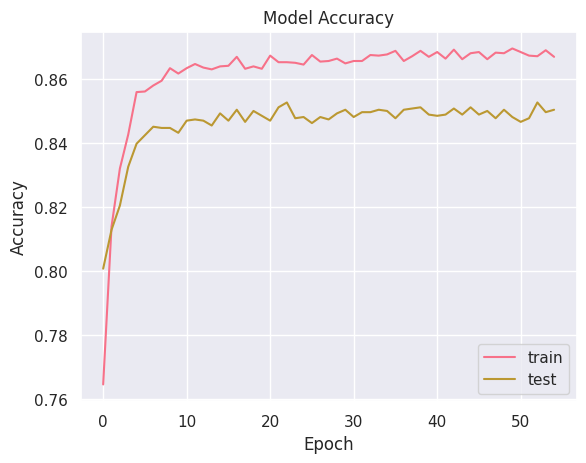

In [90]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="lower right")
plt.show()

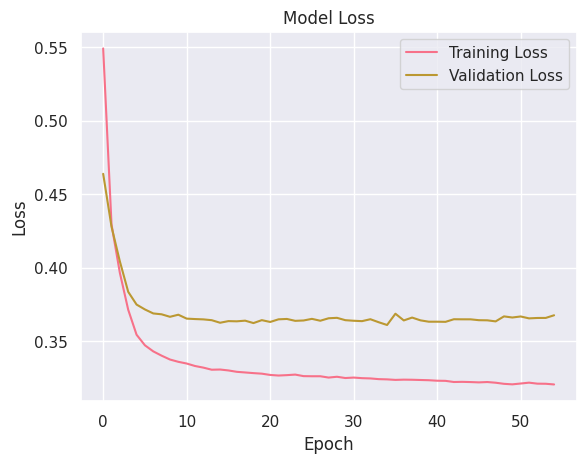

In [91]:

plt.plot(model_history.history["loss"], label="Training Loss")
plt.plot(model_history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [73]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 895us/step


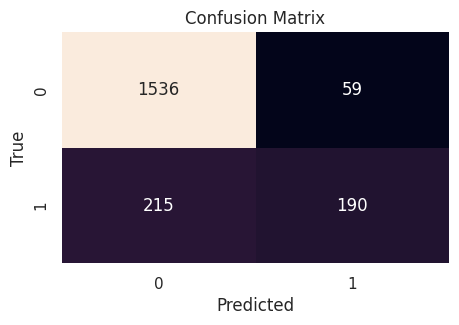

In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [107]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)

score*100

86.3

In [111]:
model.get_weights()

[array([[-0.07890859, -0.56135714,  0.09703344,  0.23424698,  0.04054888,
         -0.12381816,  0.02285651, -0.0040192 , -0.10225511,  0.01116052,
          0.24148399],
        [ 0.42818093,  0.09346522, -0.858015  , -0.2806956 , -0.768445  ,
          0.5404154 , -0.09513633, -0.79919016,  0.17919943,  0.5142769 ,
         -0.6291605 ],
        [ 0.4177803 ,  0.22564362, -0.29732692, -0.06228746,  0.13092166,
         -0.22546224,  0.11894353,  0.2692224 ,  0.19791405,  0.07155328,
          0.06678554],
        [-0.2067276 ,  0.08385063, -0.19061737,  0.07371046,  0.01483909,
          0.2142135 ,  0.2147013 ,  0.04685634, -0.46818194, -0.20873351,
         -0.39640364],
        [ 0.8448661 ,  0.1519585 ,  0.03078274,  0.46800402, -0.00873259,
          0.09059749,  0.872186  , -0.10089321, -1.2707494 ,  0.01689769,
         -0.08710326],
        [ 0.1683132 , -0.35936096, -0.2101273 , -0.1487425 , -0.02048139,
         -0.17987633, -0.21750762, -0.20044528, -0.25355792, -0.0798259

## Let's try with the dropout

In [115]:
model2 = Sequential([
    Dense(input_shape=[X_train.shape[-1]], units=11, activation="relu"),
    Dropout(0.3),
    Dense(units=7, activation="relu"),
    Dropout(0.3),
    Dense(units=6, activation="relu"),
    Dropout(0.3),
    Dense(units=1, activation="sigmoid"),
])

model2.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [117]:
model_history2 = model2.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks=[early_stop])

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6004 - accuracy: 0.7324 - val_loss: 0.4970 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5057 - accuracy: 0.7964 - val_loss: 0.4691 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.7983 - val_loss: 0.4572 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4747 - accuracy: 0.7966 - val_loss: 0.4461 - val_accuracy: 0.7963
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7998 - val_loss: 0.4413 - val_accuracy: 0.7967
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4623 - accuracy: 0.7990 - val_loss: 0.4415 - val_accuracy: 0.7959
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4531 - accuracy: 0.8056 - val_loss: 0.4346 - val_accuracy: 0.7970

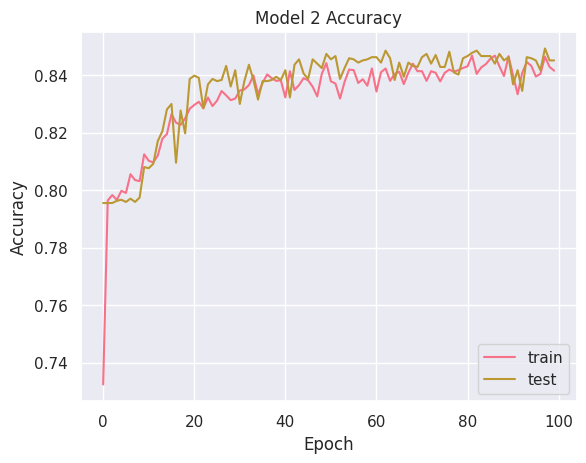

In [118]:
plt.plot(model_history2.history["accuracy"])
plt.plot(model_history2.history["val_accuracy"])
plt.title("Model 2 Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="lower right")
plt.show()

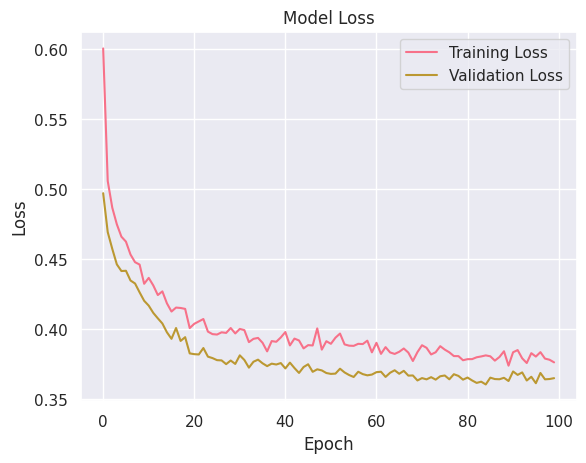

In [119]:

plt.plot(model_history2.history["loss"], label="Training Loss")
plt.plot(model_history2.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [125]:
y_pred = model2.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


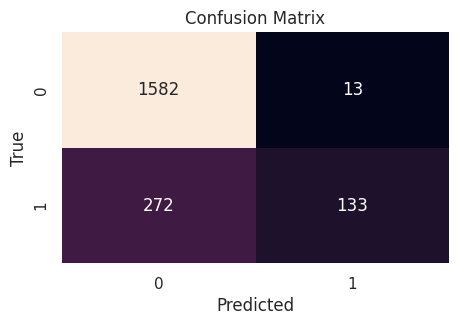

In [126]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [127]:
score = accuracy_score(y_pred, y_test)
score*100

85.75